In [ ]:
import pandas as pd
import numpy as np
from numpy.ma.core import around
from rich.filesize import decimal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re

In [11]:
# 1. Carregamento e Pré-processamento dos Dados
df = pd.read_csv('cleaned_df.csv')

In [13]:
# 2. Preparação dos Dados
# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['name'])
X = tokenizer.texts_to_sequences(df['name'])
X = pad_sequences(X, maxlen=15)

# Normalização dos preços
scaler = MinMaxScaler()
y = scaler.fit_transform(df['price'].values.reshape(-1, 1))

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [14]:
# 3. Construção do Modelo
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 64, input_length=20),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(16)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()

/home/laccan/IdeaProjects/Orion/ovenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Early Stopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 4. Treinamento do Modelo
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0200 - mae: 0.0744 - val_loss: 0.0089 - val_mae: 0.0441
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0071 - mae: 0.0415 - val_loss: 0.0075 - val_mae: 0.0380
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0057 - mae: 0.0348 - val_loss: 0.0050 - val_mae: 0.0334
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0036 - mae: 0.0306 - val_loss: 0.0038 - val_mae: 0.0299
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0026 - mae: 0.0266 - val_loss: 0.0047 - val_mae: 0.0323
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0023 - mae: 0.0257 - val_loss: 0.0033 - val_mae: 0.0291
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0028 - mae: 0.0263 - val_loss: 0.0029 - val_mae: 0.0236
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0018 - mae: 0.0236 - val_loss: 0.0027 - val_mae: 0.0222
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - l

In [17]:
model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.2139e-04 - mae: 0.0193


[0.0012558765010908246, 0.021187331527471542]

In [33]:
print(f"{np.around(y_test_original[:10].T, decimals=2)}\n{np.around(y_pred_original[:10].T, decimals=2)}")

[[ 75.11  34.9  289.9   30.9   59.9   56.9   61.01 784.31  85.9   41.9 ]]
[[ 87.33  65.25 366.87  62.61  88.75  92.51  94.48 821.6  112.08  94.46]]


In [32]:
# 5. Avaliação do Modelo
# Previsões
y_pred = model.predict(X_test)

# Desnormalização dos resultados
y_test_original = scaler.inverse_transform(y_test)
y_pred_original = scaler.inverse_transform(y_pred)

# Cálculo das métricas
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print(f"\nMétricas de Avaliação:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Métricas de Avaliação:
MSE: 7648.64
RMSE: 87.46
MAE: 52.29


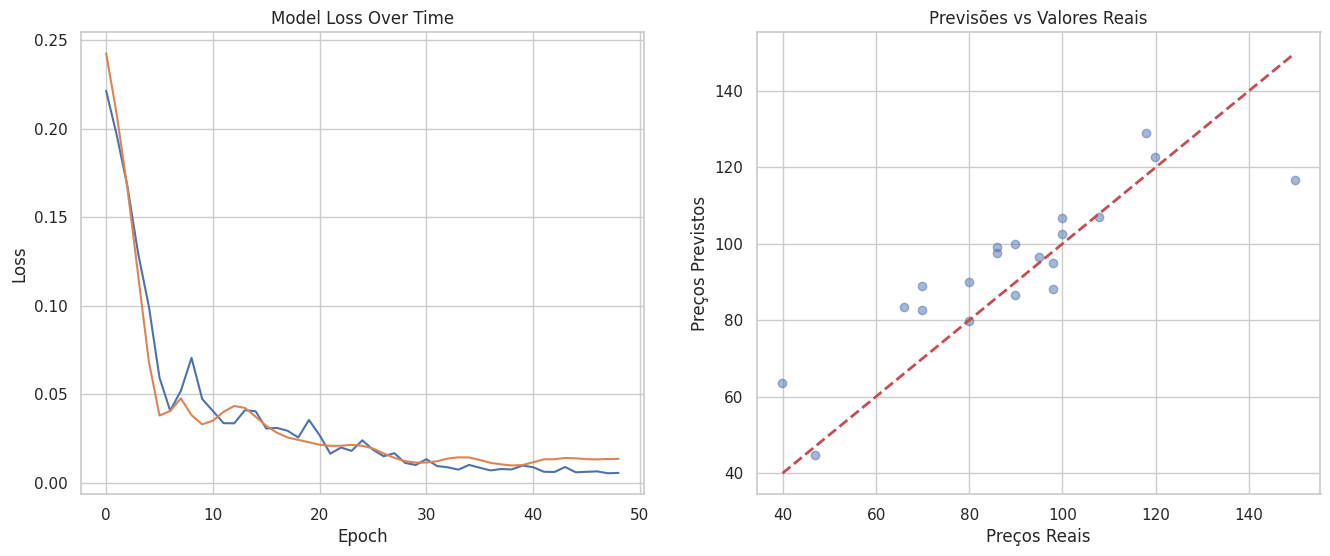

In [10]:
# 6. Visualização dos Resultados
# Gráfico de Loss
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Gráfico de Previsões vs Valores Reais
plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Previsões vs Valores Reais')
plt.grid(True)
plt.show()

In [30]:
# 7. Função para fazer novas previsões
def predict_price(product_description):
    # Limpar e processar o texto
    cleaned_text = clean_text(product_description)
    # Tokenizar
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    # Padding
    padded = pad_sequences(sequence, maxlen=20)
    # Fazer previsão
    prediction = model.predict(padded)
    # Desnormalizar
    final_price = scaler.inverse_transform(prediction)[0][0]
    return final_price

# Exemplo de uso
novo_produto = "porcelanato calacatta gold 80 x 80 polido retificado tipo a elizabeth"
preco_previsto = predict_price(novo_produto)
print(f"\nPrevisão de preço para novo produto:")
print(f"Produto: {novo_produto}")
print(f"Preço previsto: R$ {preco_previsto:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Previsão de preço para novo produto:
Produto: porcelanato calacatta gold 80 x 80 polido retificado tipo a elizabeth
Preço previsto: R$ 123.92


In [26]:
df[df.name.str.contains("calacatta")]

,id,name,price
0,999348.0,porcelanato calacatta gold 100 x 100 acetinado...,117.9
8,999350.0,porcelanato calacatta gold 100 x 100 polido re...,139.9
